In [1]:
#  Import libraries  - Numerical calculations, Data manipulation, Graphs, ML

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 

In [3]:
df = pd.read_csv('Glass.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.shape

(214, 10)

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


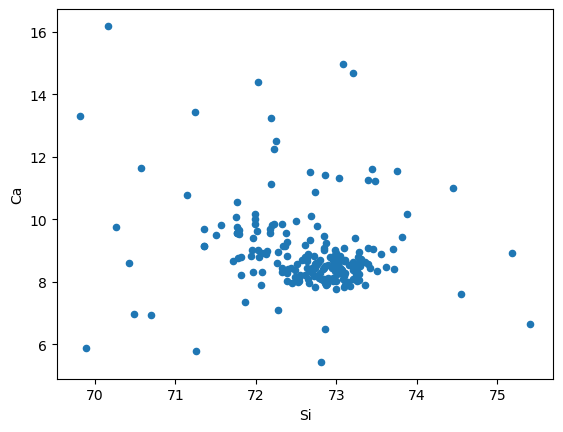

In [9]:
df.plot(kind = 'scatter', x ='Si', y='Ca')
plt.show()

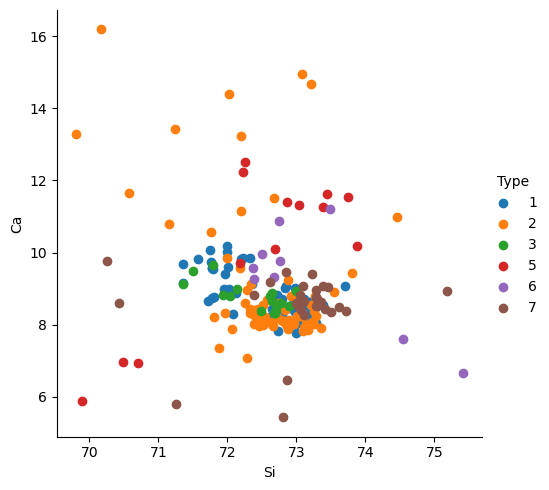

In [12]:
sns.FacetGrid(df, hue = 'Type', height = 5).map(plt.scatter, 'Si','Ca').add_legend()
plt.show()

<Axes: xlabel='Type', ylabel='Fe'>

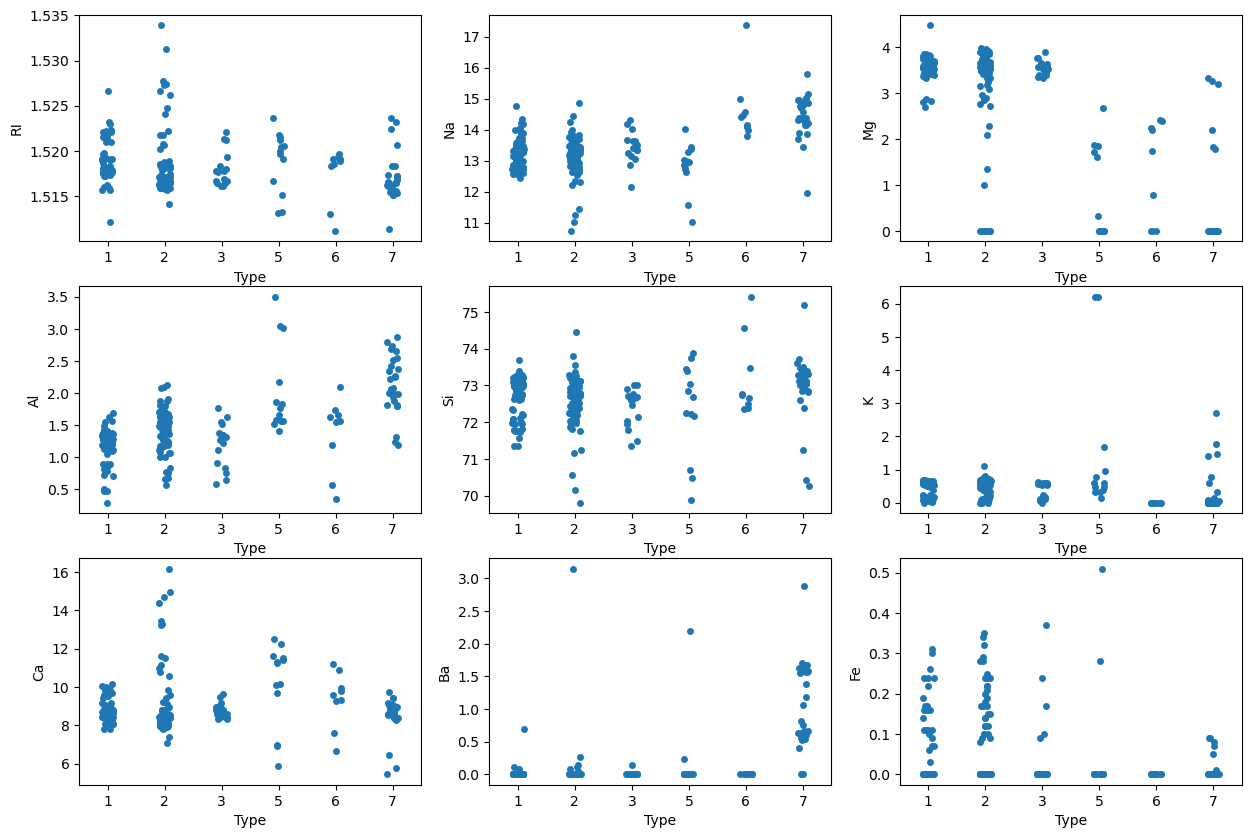

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.stripplot(x='Type', y='RI', data=df, jitter = True)
plt.subplot(3,3,2)
sns.stripplot(x='Type', y='Na', data=df, jitter = True)
plt.subplot(3,3,3)
sns.stripplot(x='Type', y='Mg', data=df, jitter = True)

plt.subplot(3,3,4)
sns.stripplot(x='Type', y='Al', data=df, jitter = True)
plt.subplot(3,3,5)
sns.stripplot(x='Type', y='Si', data=df, jitter = True)
plt.subplot(3,3,6)
sns.stripplot(x='Type', y='K', data=df, jitter = True)

plt.subplot(3,3,7)
sns.stripplot(x='Type', y='Ca', data=df, jitter = True)
plt.subplot(3,3,8)
sns.stripplot(x='Type', y='Ba', data=df, jitter = True)
plt.subplot(3,3,9)
sns.stripplot(x='Type', y='Fe', data=df, jitter = True)

<Axes: >

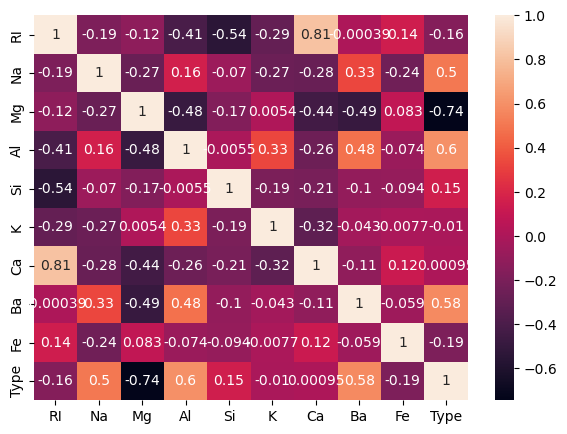

In [23]:
## Correlation analysis 

corr = df.corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, annot = True)

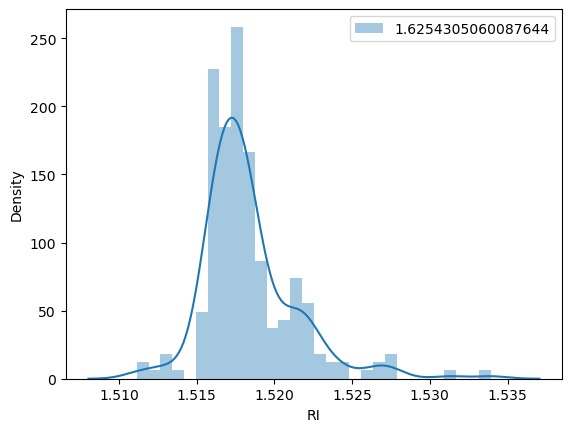

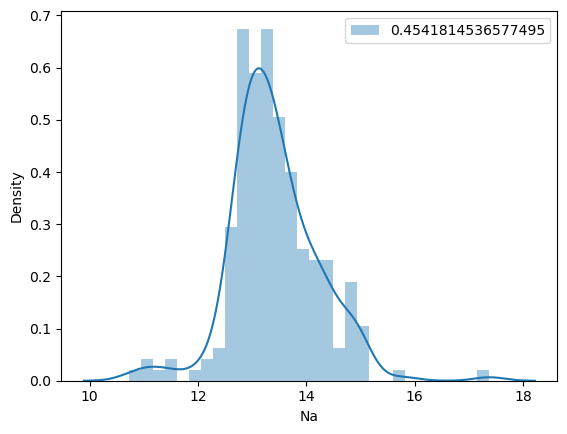

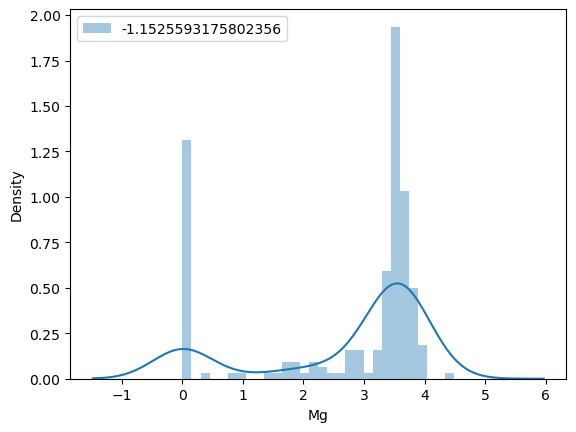

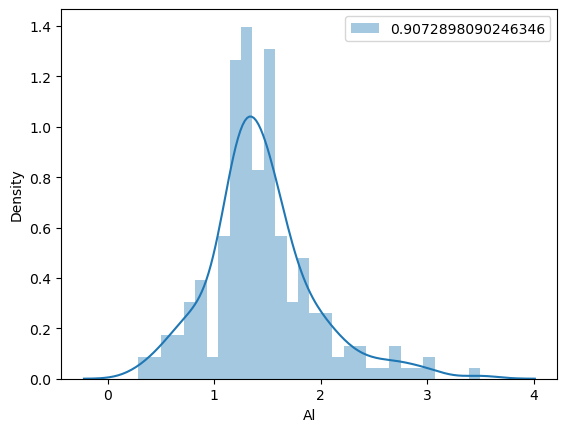

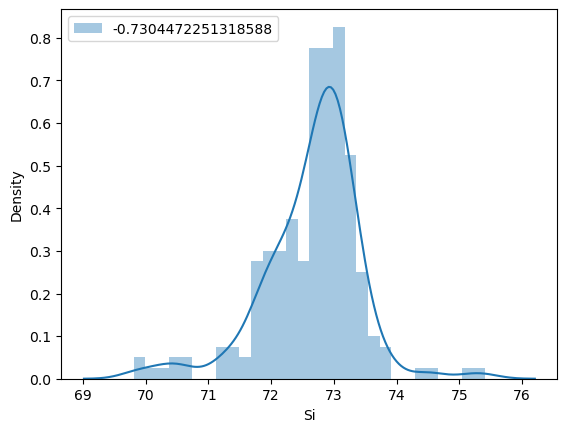

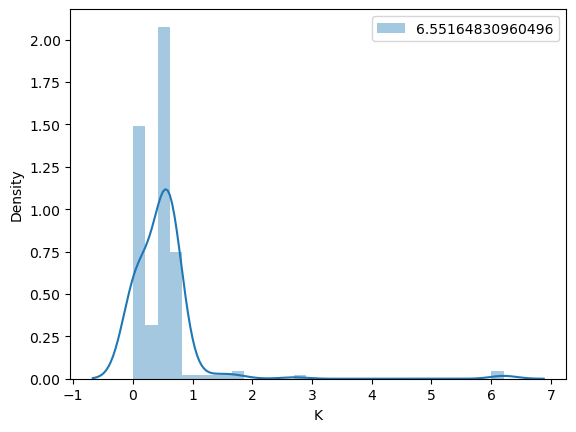

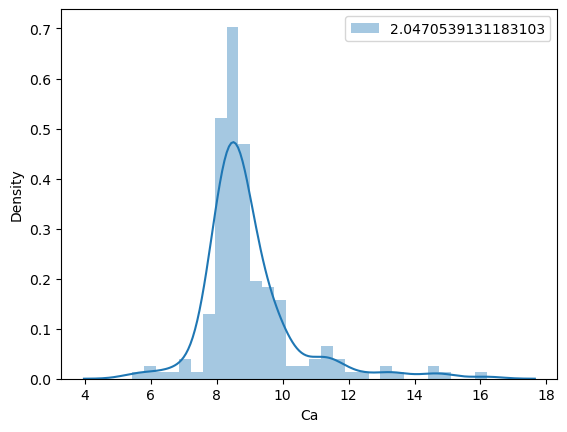

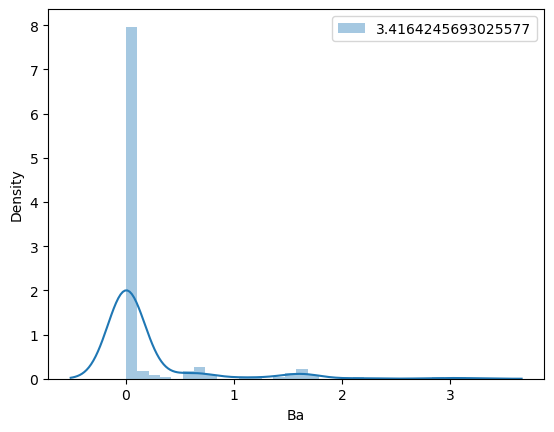

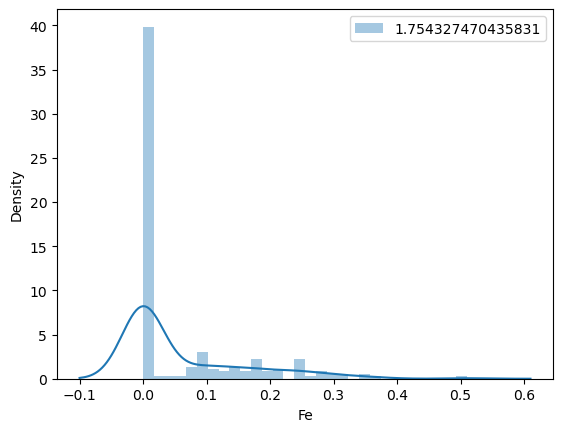

In [27]:
features = df.columns[:-1].tolist()

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde = True, label = skew, bins = 30)
    plt.legend(loc='best')
    plt.show()

In [29]:
from collections import Counter

In [30]:
# Outliers treatment 

def outlier_hunt(df):
    outlier_indices = []
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3-Q1
        outlier_step = 1.5*IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step)|(df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>2)
    return multiple_outliers

print("Data contains %d values with more than 2 outliers" %(len(outlier_hunt(df[features]))))

Data contains 14 values with more than 2 outliers


In [31]:
# Prepare data after managing outliers 

outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop = True)
print(df.shape)

(200, 10)


In [33]:
X = df.drop('Type', axis = 1)
y = df['Type']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 9)
(50, 9)
(150,)
(50,)


In [38]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [41]:
from sklearn.metrics import accuracy_score

y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print('Training set :', accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print('Test set :', accuracy_nb_test)

Training set : 0.6466666666666666
Test set : 0.6


In [43]:
# Decision tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

classifier_dt = DecisionTreeClassifier()

steps = [
    ('scaler',StandardScaler()),
    ('model', DecisionTreeClassifier())
]

dt_pipe = Pipeline(steps)

In [44]:
# Apply Grid search 

from sklearn.model_selection import GridSearchCV

parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train)

In [45]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.82
Test set:  0.62


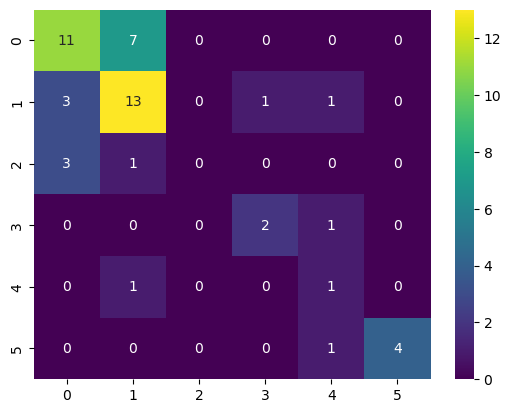

In [46]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [47]:
# Random forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()

steps = [
    ('scaler',StandardScaler()),
    ('model', RandomForestClassifier())
]

rf_pipe = Pipeline(steps)

In [48]:
parameters =  { "model__max_features": ["auto", "sqrt"],
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 4],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }

classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter = 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [49]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.78


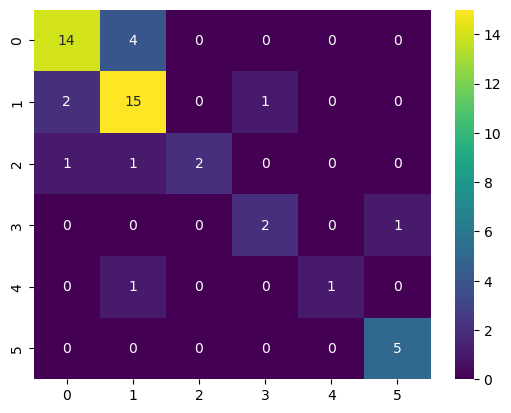

In [50]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [51]:
models = [('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test)
                   ]

predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

In [52]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes,0.646667,0.60
1,Decision Tree Classification,0.820000,0.62
2,Random Forest Classification,1.000000,0.78


In [53]:
from sklearn.metrics import classification_report

In [56]:
sk_report = classification_report(
    digits=6,
    y_true=y_test,
    y_pred=classifier_rf.predict(X_test))
print(sk_report)

              precision    recall  f1-score   support

           1   0.823529  0.777778  0.800000        18
           2   0.714286  0.833333  0.769231        18
           3   1.000000  0.500000  0.666667         4
           5   0.666667  0.666667  0.666667         3
           6   1.000000  0.500000  0.666667         2
           7   0.833333  1.000000  0.909091         5

    accuracy                       0.780000        50
   macro avg   0.839636  0.712963  0.746387        50
weighted avg   0.796947  0.780000  0.775832        50



In [58]:
# Reduction in overfitting 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

steps = [
    ('model', RandomForestClassifier())
]

rf_pipe = Pipeline(steps)

parameters = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [5, 10, 20, None],
    "model__max_features": ["sqrt", "log2"],
    "model__min_samples_split": [5, 10, 20],
    "model__min_samples_leaf": [2, 4, 8],
    "model__bootstrap": [True],
    "model__criterion": ["gini"],
    "model__random_state": [42]
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifier_rf = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=parameters,
    n_iter=50,
    cv=cv_strategy,
    random_state=42,
    verbose=4,
    n_jobs=-1
)

classifier_rf.fit(X_train, y_train.ravel())

y_pred_rf_train = classifier_rf.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_rf_train))

y_pred_rf_test = classifier_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_test))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training Accuracy: 0.96
Test Accuracy: 0.86


In [60]:
models = [('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_score(y_train, y_pred_rf_train), accuracy_score(y_test, y_pred_rf_test))
                   ]

predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes,0.646667,0.60
1,Decision Tree Classification,0.820000,0.62
2,Random Forest Classification,0.960000,0.86
